In [58]:
import random
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [59]:
df = pd.read_csv('Avg_CRU.csv')
df.head()

,time,lat,lon,timeseries-tas-monthly-mean
0,1901-01-16,26.25,-122.75,NaN
1,1901-01-16,26.25,-122.25,NaN
2,1901-01-16,26.25,-121.75,NaN
3,1901-01-16,26.25,-121.25,NaN
4,1901-01-16,26.25,-120.75,NaN


In [3]:
df['time'].value_counts() <= 4576

1901-01-16    True
1982-04-16    True
1982-02-15    True
1982-01-16    True
1981-12-16    True
              ... 
1941-03-16    True
1941-02-15    True
1941-01-16    True
1940-12-16    True
2021-12-16    True
Name: time, Length: 1452, dtype: bool

In [7]:
df.loc[df['time'] == '1901-01-16', :]

,time,lat,lon,timeseries-tas-monthly-mean
0,1901-01-16,26.25,-122.75,NaN
1,1901-01-16,26.25,-122.25,NaN
2,1901-01-16,26.25,-121.75,NaN
3,1901-01-16,26.25,-121.25,NaN
4,1901-01-16,26.25,-120.75,NaN
...,...,...,...,...
4571,1901-01-16,47.75,-73.25,-16.300001
4572,1901-01-16,47.75,-72.75,-16.300001
4573,1901-01-16,47.75,-72.25,-16.600000
4574,1901-01-16,47.75,-71.75,-16.200000


In [16]:
54912 / 4576

12.0

In [7]:
df.shape

(6644352, 4)

In [40]:
total_rows  = 6644352

In [65]:
split = df.loc[(df['time'] >= '1901-01-16') & (df['time'] < '1950-01-16'), :]
split

,time,lat,lon,timeseries-tas-monthly-mean
0,1901-01-16,26.25,-122.75,NaN
1,1901-01-16,26.25,-122.25,NaN
2,1901-01-16,26.25,-121.75,NaN
3,1901-01-16,26.25,-121.25,NaN
4,1901-01-16,26.25,-120.75,NaN
...,...,...,...,...
2690683,1949-12-16,47.75,-73.25,-9.600000
2690684,1949-12-16,47.75,-72.75,-9.500000
2690685,1949-12-16,47.75,-72.25,-9.900001
2690686,1949-12-16,47.75,-71.75,-10.100000


In [66]:
rows_per_chunk  = split.shape[0]
rows_per_chunk

2690688

In [67]:
split_1 = df.loc[(df['time'] >= '1950-01-16') & (df['time'] < '2001-01-16'), :]
split_1

,time,lat,lon,timeseries-tas-monthly-mean
2690688,1950-01-16,26.25,-122.75,NaN
2690689,1950-01-16,26.25,-122.25,NaN
2690690,1950-01-16,26.25,-121.75,NaN
2690691,1950-01-16,26.25,-121.25,NaN
2690692,1950-01-16,26.25,-120.75,NaN
...,...,...,...,...
5491195,2000-12-16,47.75,-73.25,-14.0
5491196,2000-12-16,47.75,-72.75,-13.5
5491197,2000-12-16,47.75,-72.25,-13.6
5491198,2000-12-16,47.75,-71.75,-13.8


In [68]:
rows_per_chunk  = split_1.shape[0]
rows_per_chunk

2800512

In [69]:
split_2 = df.loc[(df['time'] >= '2001-01-16') & (df['time'] < '2021-01-16'), :]
split_2

,time,lat,lon,timeseries-tas-monthly-mean
5491200,2001-01-16,26.25,-122.75,NaN
5491201,2001-01-16,26.25,-122.25,NaN
5491202,2001-01-16,26.25,-121.75,NaN
5491203,2001-01-16,26.25,-121.25,NaN
5491204,2001-01-16,26.25,-120.75,NaN
...,...,...,...,...
6589435,2020-12-16,47.75,-73.25,-8.300000
6589436,2020-12-16,47.75,-72.75,-8.400001
6589437,2020-12-16,47.75,-72.25,-8.700000
6589438,2020-12-16,47.75,-71.75,-9.200000


In [72]:
rows_per_chunk  = split_2.shape[0]
rows_per_chunk

1098240

In [ ]:
split = df.loc[(df['time'] >= '1901-01-16') & (df['time'] < '1950-01-16'), :]
split

In [52]:
rows_per_chunk  = split.shape[0]
rows_per_chunk

2690688

In [55]:
num_chunks = total_rows // rows_per_chunk
num_chunks

2

In [51]:
if total_rows % rows_per_chunk != 0:
    num_chunks += 1
    print(num_chunks)

4


In [60]:
df['time'] = pd.to_datetime(df['time'])

In [9]:
df.shape

(6644352, 4)

In [10]:
df.groupby(['lat', 'lon', 'time'])['timeseries-tas-monthly-mean'].mean()

lat    lon      time      
26.25  -122.75  1901-01-16          NaN
                1901-02-15          NaN
                1901-03-16          NaN
                1901-04-16          NaN
                1901-05-16          NaN
                                ...    
47.75  -71.25   2021-08-16    15.300000
                2021-09-16    10.200000
                2021-10-16     5.800000
                2021-11-16    -4.300000
                2021-12-16    -9.900001
Name: timeseries-tas-monthly-mean, Length: 6644352, dtype: float64

In [11]:
df['time'].min(), df['time'].max()

(Timestamp('1901-01-16 00:00:00'), Timestamp('2021-12-16 00:00:00'))

In [61]:
df_copy = df.copy()

In [62]:
df_copy['time'] = pd.to_datetime(df_copy['time'])
df_copy['year'] = df_copy['time'].dt.year
df_copy['month'] = df_copy['time'].dt.month
df_copy['dayofyear'] = df_copy['time'].dt.dayofyear
df_copy['quarter'] = df_copy['time'].dt.quarter

In [56]:
df_copy.corr()['timeseries-tas-monthly-mean']

lat                           -0.498249
lon                           -0.013289
timeseries-tas-monthly-mean    1.000000
year                           0.031014
month                          0.196550
dayofyear                      0.194692
quarter                        0.203735
Name: timeseries-tas-monthly-mean, dtype: float64

In [5]:
year_1901 = df_copy.loc[df_copy['year'] == 1901, :]
year_1901

,time,lat,lon,timeseries-tas-monthly-mean,year,month,dayofyear,quarter
0,1901-01-16,26.25,-122.75,NaN,1901,1,16,1
1,1901-01-16,26.25,-122.25,NaN,1901,1,16,1
2,1901-01-16,26.25,-121.75,NaN,1901,1,16,1
3,1901-01-16,26.25,-121.25,NaN,1901,1,16,1
4,1901-01-16,26.25,-120.75,NaN,1901,1,16,1
...,...,...,...,...,...,...,...,...
54907,1901-12-16,47.75,-73.25,-11.400001,1901,12,350,4
54908,1901-12-16,47.75,-72.75,-11.400001,1901,12,350,4
54909,1901-12-16,47.75,-72.25,-11.900001,1901,12,350,4
54910,1901-12-16,47.75,-71.75,-12.200000,1901,12,350,4


In [55]:
year_1901.corr()['timeseries-tas-monthly-mean']

lat                           -0.471452
lon                           -0.040230
timeseries-tas-monthly-mean    1.000000
year                                NaN
month                          0.206068
dayofyear                      0.203878
quarter                        0.223656
Name: timeseries-tas-monthly-mean, dtype: float64

In [33]:
for i in tqdm(year_1901['month'].unique()):
    nan_values = year_1901[year_1901['month'] == i]['timeseries-tas-monthly-mean']
    nan_values = nan_values.isnull().sum()

100%|████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 1714.06it/s]


In [34]:
nan_values

833

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


year_1901_notna = year_1901.loc[year_1901['timeseries-tas-monthly-mean'].notna(), :]
year_1901_nan = year_1901.loc[year_1901['timeseries-tas-monthly-mean'].isnull(), :]

X = year_1901_notna[['lat', 'lon', 'month', 'quarter', 'dayofyear']]
y = year_1901_notna['timeseries-tas-monthly-mean']
    
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

model = MLPRegressor(alpha=0.001, hidden_layer_sizes=(300,), learning_rate_init=0.001, learning_rate='constant', max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=True)
r_score = r2_score(y_test, y_pred)
print(rmse)
print(r_score)

2.144850375672081
0.981133690045804


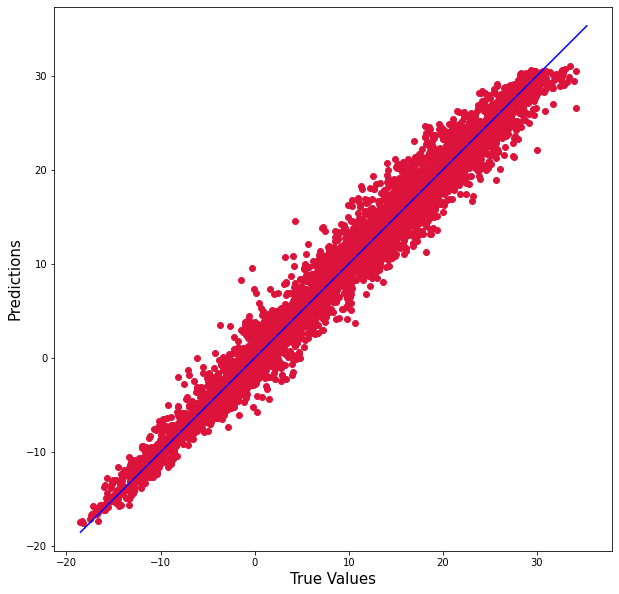

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_train))
p2 = min(min(y_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

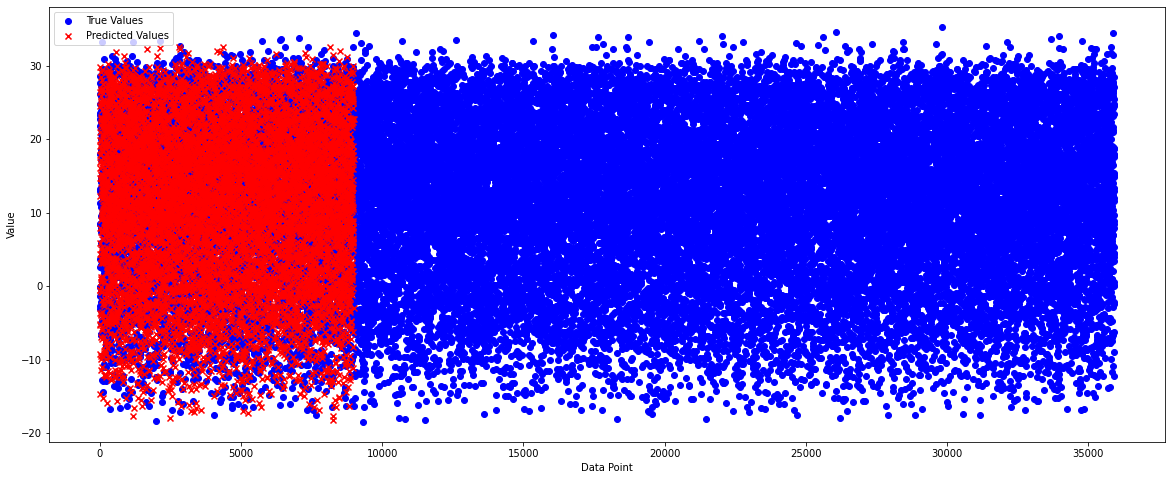

In [52]:
plt.figure(figsize=(20, 8))
plt.scatter(np.arange(len(y_train)), y_train, c='b', label='True Values')
plt.scatter(np.arange(len(y_pred)), y_pred, c='r', marker='x', label='Predicted Values')

plt.legend(loc='upper left')
plt.xlabel('Data Point')
plt.ylabel('Value')

plt.show()

In [7]:
import xgboost as xgb

year_1901_notna = year_1901.loc[year_1901['timeseries-tas-monthly-mean'].notna(), :]
year_1901_nan = year_1901.loc[year_1901['timeseries-tas-monthly-mean'].isnull(), :]

X = year_1901_notna[['lat', 'lon']]
y = year_1901_notna['timeseries-tas-monthly-mean']
    
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=True)
r_score = r2_score(y_test, y_pred)
print(rmse)
print(r_score)

NameError: name 'year_1901' is not defined

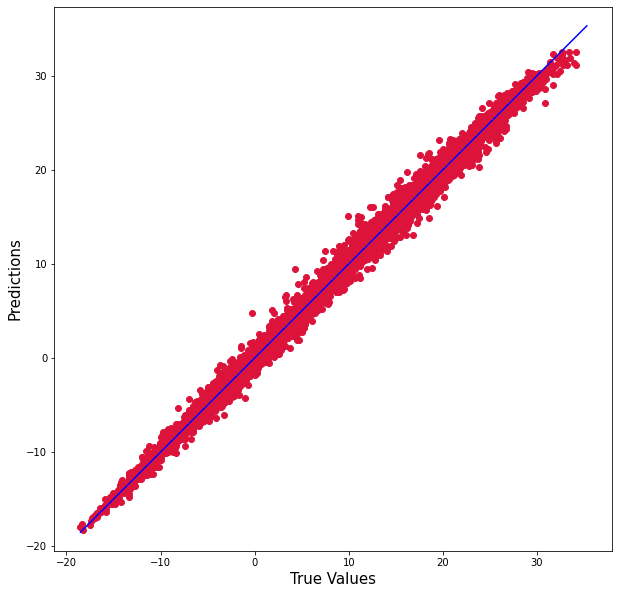

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_train))
p2 = min(min(y_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

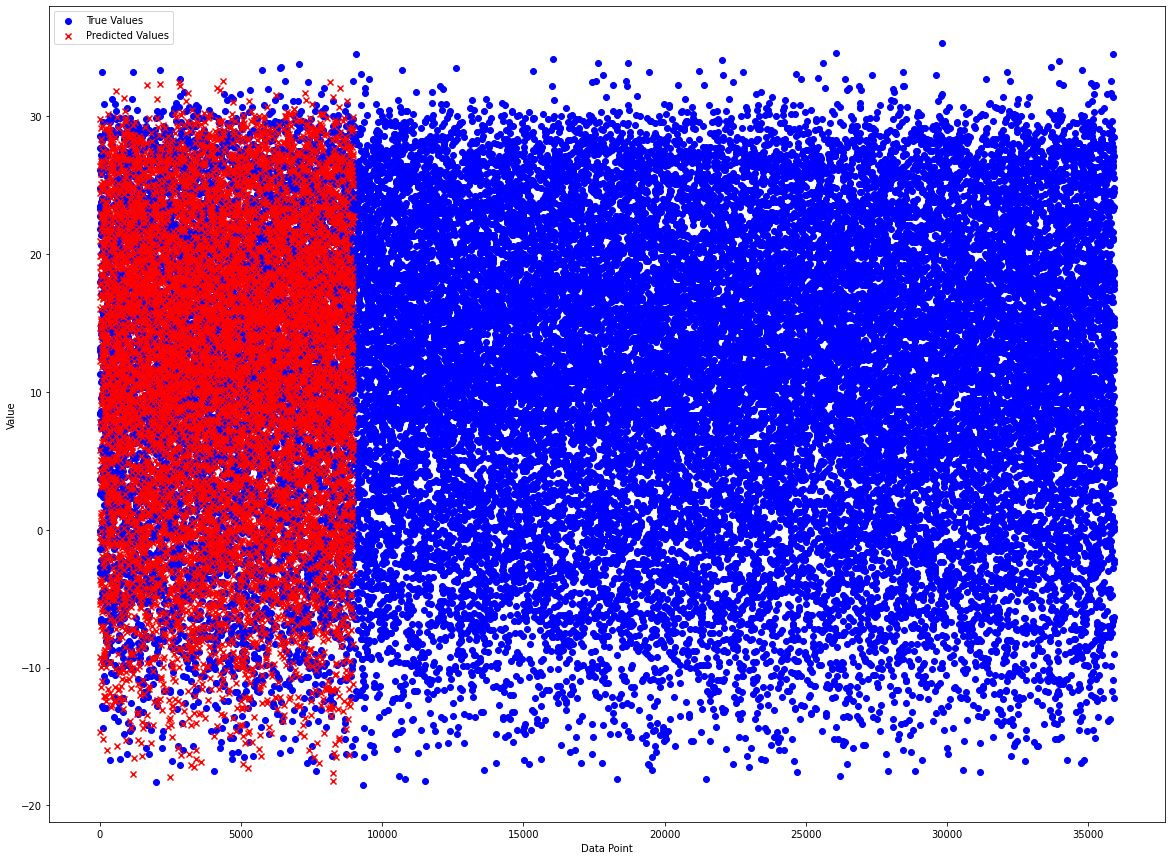

In [48]:
plt.figure(figsize=(20, 15))
plt.scatter(np.arange(len(y_train)), y_train, c='b', label='True Values')
plt.scatter(np.arange(len(y_pred)), y_pred, c='r', marker='x', label='Predicted Values')

plt.legend(loc='upper left')
plt.xlabel('Data Point')
plt.ylabel('Value')

plt.show()

In [43]:
import lightgbm as lgb

year_1901_notna = year_1901.loc[year_1901['timeseries-tas-monthly-mean'].notna(), :]
year_1901_nan = year_1901.loc[year_1901['timeseries-tas-monthly-mean'].isnull(), :]

X = year_1901_notna[['lat', 'lon', 'month', 'dayofyear']]
y = year_1901_notna['timeseries-tas-monthly-mean']
    
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

model = lgb.LGBMRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=True)
r_score = r2_score(y_test, y_pred)
print(rmse)
print(r_score)

1.37435889414769
0.9879110071362569


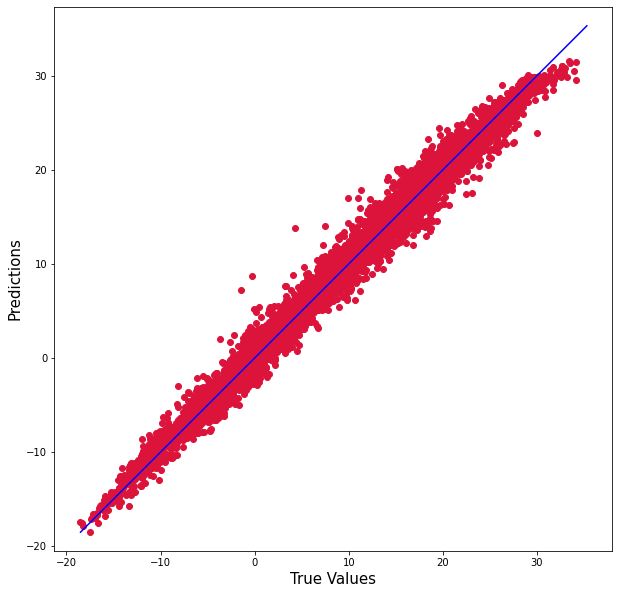

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_train))
p2 = min(min(y_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

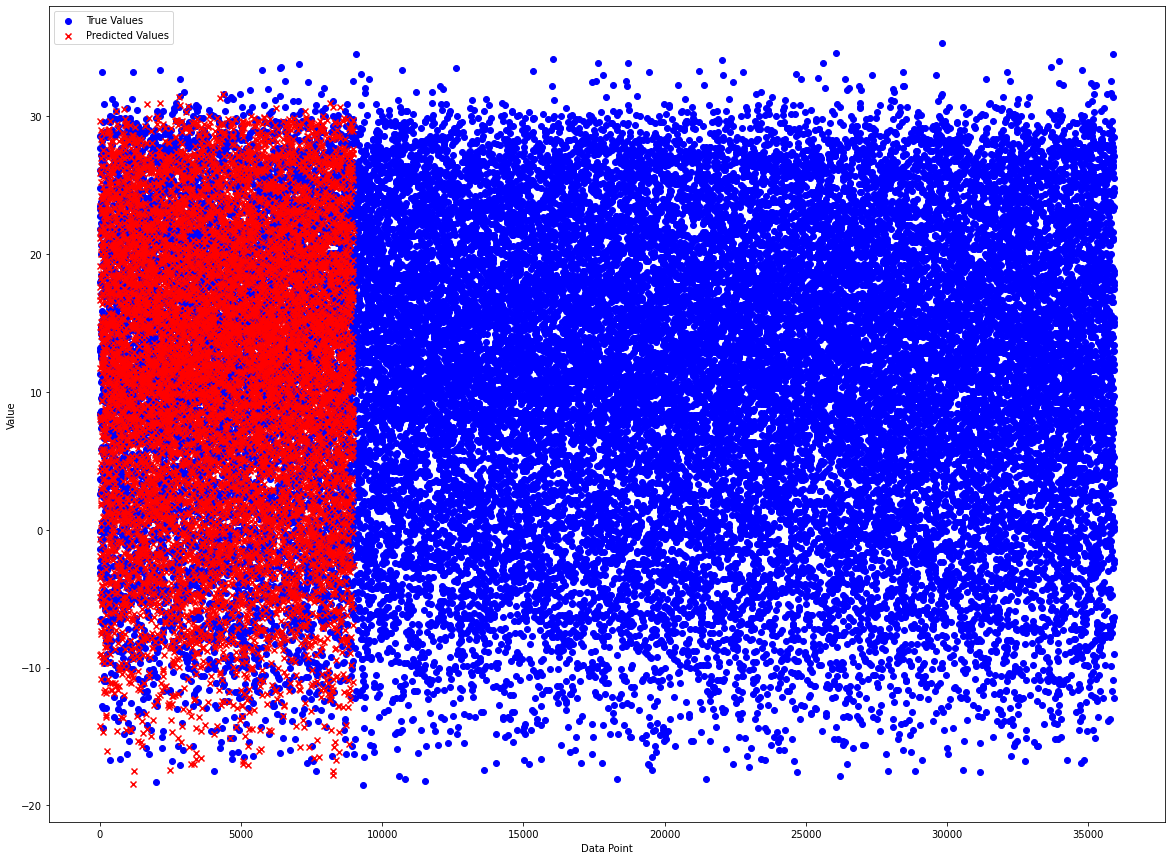

In [45]:
plt.figure(figsize=(20, 15))
plt.scatter(np.arange(len(y_train)), y_train, c='b', label='True Values')
plt.scatter(np.arange(len(y_pred)), y_pred, c='r', marker='x', label='Predicted Values')

plt.legend(loc='upper left')
plt.xlabel('Data Point')
plt.ylabel('Value')

plt.show()

In [59]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

unique_months = year_1901['month'].unique()
frame = pd.DataFrame()
for i in tqdm(unique_months):
    f = year_1901[year_1901['month'] == i].dropna(axis=0)
    X = f[['lat', 'lon']]
    y = f['timeseries-tas-monthly-mean']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    #X_scaled = X_scaled.reshape(-1, 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred_linreg = linreg.predict(X_test)
    rmse_linreg = mean_squared_error(y_test, y_pred_linreg, squared=True)
    
    lasso = Lasso()
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=True)
    
    ridge = Ridge(alpha=0.3)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=True)
    
    mlp = MLPRegressor(alpha=0.01, max_iter=1000)
    mlp.fit(X_train, y_train)
    y_pred_mlp = mlp.predict(X_test)
    rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=True)
    
    new_frame = pd.DataFrame({'Month': [i], 'RMSE_LinearRegression': [rmse_linreg], 'RMSE_Lasso': [rmse_lasso],
                              'RMSE_Ridge': [rmse_ridge], 'RMSE_MLP': [rmse_mlp]})
    frame = pd.concat([frame, new_frame])

 33%|███████████████████████████▋                                                       | 4/12 [00:22<00:46,  5.83s/it]C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
 42%|██████████████████████████████████▌                                                | 5/12 [00:30<00:46,  6.65s/it]C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
 58%|████████████████████████████████████████████████▍                                  | 7/12 [00:48<00:38,  7.72s/it]C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_percep

In [63]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
year_1901_notna = year_1901.loc[year_1901['timeseries-tas-monthly-mean'].notna(), :]
year_1901_nan = year_1901.loc[year_1901['timeseries-tas-monthly-mean'].isnull(), :]

X = year_1901_notna[['lat', 'lon', 'month', 'quarter', 'dayofyear']]
y = year_1901_notna['timeseries-tas-monthly-mean']
    
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

model = MLPRegressor()

param_grid = {'alpha': [0.1, 0.01, 0.001],
              'learning_rate': ['adaptive', 'constant'],
              'hidden_layer_sizes': [(1,), (11,), (51,), (100,), (200,), (300,)],
              'learning_rate_init': [0.1, 0.01, 0.001],
              'max_iter': [2000]
             }

grid = GridSearchCV(model, param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=10)
grid.fit(X_train, y_train)
score = grid.score(X_test, y_test)
print(score)
params = grid.best_params_
print(params)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV 1/3; 1/108] START alpha=0.1, hidden_layer_sizes=(1,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=2000
[CV 1/3; 1/108] END alpha=0.1, hidden_layer_sizes=(1,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=2000;, score=-8.390 total time=   2.2s
[CV 2/3; 1/108] START alpha=0.1, hidden_layer_sizes=(1,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=2000
[CV 2/3; 1/108] END alpha=0.1, hidden_layer_sizes=(1,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=2000;, score=-7.948 total time=   2.0s
[CV 3/3; 1/108] START alpha=0.1, hidden_layer_sizes=(1,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=2000
[CV 3/3; 1/108] END alpha=0.1, hidden_layer_sizes=(1,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=2000;, score=-8.241 total time=   2.1s
[CV 1/3; 2/108] START alpha=0.1, hidden_layer_sizes=(1,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=2000


[CV 1/3; 11/108] END alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, learning_rate_init=0.01, max_iter=2000;, score=-2.632 total time=   3.5s
[CV 2/3; 11/108] START alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, learning_rate_init=0.01, max_iter=2000
[CV 2/3; 11/108] END alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, learning_rate_init=0.01, max_iter=2000;, score=-3.295 total time=   2.3s
[CV 3/3; 11/108] START alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, learning_rate_init=0.01, max_iter=2000
[CV 3/3; 11/108] END alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, learning_rate_init=0.01, max_iter=2000;, score=-3.086 total time=   5.8s
[CV 1/3; 12/108] START alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, learning_rate_init=0.001, max_iter=2000
[CV 1/3; 12/108] END alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, learning_rate_init=0.001, max_iter=2000;, score=-3.033 total time=  16.3s
[CV 2/3; 

[CV 1/3; 21/108] END alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000;, score=-1.861 total time=  59.5s
[CV 2/3; 21/108] START alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000
[CV 2/3; 21/108] END alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000;, score=-1.837 total time=  49.5s
[CV 3/3; 21/108] START alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000
[CV 3/3; 21/108] END alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000;, score=-1.804 total time=  44.8s
[CV 1/3; 22/108] START alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.1, max_iter=2000
[CV 1/3; 22/108] END alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.1, max_iter=2000;, score=-2.078 total time=   4.6s
[

[CV 1/3; 31/108] END alpha=0.1, hidden_layer_sizes=(300,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=2000;, score=-2.007 total time=  11.9s
[CV 2/3; 31/108] START alpha=0.1, hidden_layer_sizes=(300,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=2000
[CV 2/3; 31/108] END alpha=0.1, hidden_layer_sizes=(300,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=2000;, score=-1.838 total time=   6.9s
[CV 3/3; 31/108] START alpha=0.1, hidden_layer_sizes=(300,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=2000
[CV 3/3; 31/108] END alpha=0.1, hidden_layer_sizes=(300,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=2000;, score=-1.816 total time=   9.6s
[CV 1/3; 32/108] START alpha=0.1, hidden_layer_sizes=(300,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=2000
[CV 1/3; 32/108] END alpha=0.1, hidden_layer_sizes=(300,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=2000;, score=-1.677 total time=  23.2s
[CV 2/3; 

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 39/108] END alpha=0.01, hidden_layer_sizes=(1,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000;, score=-8.825 total time=  42.4s
[CV 3/3; 39/108] START alpha=0.01, hidden_layer_sizes=(1,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000
[CV 3/3; 39/108] END alpha=0.01, hidden_layer_sizes=(1,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000;, score=-8.038 total time=   6.3s
[CV 1/3; 40/108] START alpha=0.01, hidden_layer_sizes=(1,), learning_rate=constant, learning_rate_init=0.1, max_iter=2000
[CV 1/3; 40/108] END alpha=0.01, hidden_layer_sizes=(1,), learning_rate=constant, learning_rate_init=0.1, max_iter=2000;, score=-7.989 total time=   4.5s
[CV 2/3; 40/108] START alpha=0.01, hidden_layer_sizes=(1,), learning_rate=constant, learning_rate_init=0.1, max_iter=2000
[CV 2/3; 40/108] END alpha=0.01, hidden_layer_sizes=(1,), learning_rate=constant, learning_rate_init=0.1, max_iter=2000;, score=-7.997 total time=   0.6s
[CV 3/3; 40/

[CV 2/3; 49/108] END alpha=0.01, hidden_layer_sizes=(51,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=2000;, score=-2.416 total time=   3.8s
[CV 3/3; 49/108] START alpha=0.01, hidden_layer_sizes=(51,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=2000
[CV 3/3; 49/108] END alpha=0.01, hidden_layer_sizes=(51,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=2000;, score=-2.031 total time=   3.4s
[CV 1/3; 50/108] START alpha=0.01, hidden_layer_sizes=(51,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=2000
[CV 1/3; 50/108] END alpha=0.01, hidden_layer_sizes=(51,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=2000;, score=-1.958 total time=   9.9s
[CV 2/3; 50/108] START alpha=0.01, hidden_layer_sizes=(51,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=2000
[CV 2/3; 50/108] END alpha=0.01, hidden_layer_sizes=(51,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=2000;, score=-1.953 total time=  10.7s
[CV 3/3

[CV 2/3; 59/108] END alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, max_iter=2000;, score=-1.871 total time=   8.6s
[CV 3/3; 59/108] START alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, max_iter=2000
[CV 3/3; 59/108] END alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, max_iter=2000;, score=-1.739 total time=  18.0s
[CV 1/3; 60/108] START alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=2000
[CV 1/3; 60/108] END alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=2000;, score=-1.806 total time= 1.2min
[CV 2/3; 60/108] START alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=2000
[CV 2/3; 60/108] END alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=2000;, score=-1.800 total time= 

[CV 2/3; 69/108] END alpha=0.01, hidden_layer_sizes=(300,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000;, score=-1.581 total time= 2.2min
[CV 3/3; 69/108] START alpha=0.01, hidden_layer_sizes=(300,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000
[CV 3/3; 69/108] END alpha=0.01, hidden_layer_sizes=(300,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000;, score=-1.505 total time= 2.7min
[CV 1/3; 70/108] START alpha=0.01, hidden_layer_sizes=(300,), learning_rate=constant, learning_rate_init=0.1, max_iter=2000
[CV 1/3; 70/108] END alpha=0.01, hidden_layer_sizes=(300,), learning_rate=constant, learning_rate_init=0.1, max_iter=2000;, score=-1.757 total time=   6.8s
[CV 2/3; 70/108] START alpha=0.01, hidden_layer_sizes=(300,), learning_rate=constant, learning_rate_init=0.1, max_iter=2000
[CV 2/3; 70/108] END alpha=0.01, hidden_layer_sizes=(300,), learning_rate=constant, learning_rate_init=0.1, max_iter=2000;, score=-1.961 total time=  10.9

[CV 2/3; 79/108] END alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=2000;, score=-2.681 total time=   0.6s
[CV 3/3; 79/108] START alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=2000
[CV 3/3; 79/108] END alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=2000;, score=-2.414 total time=   0.8s
[CV 1/3; 80/108] START alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=2000
[CV 1/3; 80/108] END alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=2000;, score=-3.590 total time=   1.6s
[CV 2/3; 80/108] START alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=2000
[CV 2/3; 80/108] END alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=2000;, score=-2.984 total time=   2.6s


[CV 2/3; 89/108] END alpha=0.001, hidden_layer_sizes=(51,), learning_rate=constant, learning_rate_init=0.01, max_iter=2000;, score=-1.998 total time=  10.9s
[CV 3/3; 89/108] START alpha=0.001, hidden_layer_sizes=(51,), learning_rate=constant, learning_rate_init=0.01, max_iter=2000
[CV 3/3; 89/108] END alpha=0.001, hidden_layer_sizes=(51,), learning_rate=constant, learning_rate_init=0.01, max_iter=2000;, score=-1.726 total time=  26.4s
[CV 1/3; 90/108] START alpha=0.001, hidden_layer_sizes=(51,), learning_rate=constant, learning_rate_init=0.001, max_iter=2000
[CV 1/3; 90/108] END alpha=0.001, hidden_layer_sizes=(51,), learning_rate=constant, learning_rate_init=0.001, max_iter=2000;, score=-2.050 total time=  53.0s
[CV 2/3; 90/108] START alpha=0.001, hidden_layer_sizes=(51,), learning_rate=constant, learning_rate_init=0.001, max_iter=2000
[CV 2/3; 90/108] END alpha=0.001, hidden_layer_sizes=(51,), learning_rate=constant, learning_rate_init=0.001, max_iter=2000;, score=-1.843 total time= 

[CV 1/3; 99/108] END alpha=0.001, hidden_layer_sizes=(200,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000;, score=-1.803 total time= 1.6min
[CV 2/3; 99/108] START alpha=0.001, hidden_layer_sizes=(200,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000
[CV 2/3; 99/108] END alpha=0.001, hidden_layer_sizes=(200,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000;, score=-1.568 total time= 2.9min
[CV 3/3; 99/108] START alpha=0.001, hidden_layer_sizes=(200,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000
[CV 3/3; 99/108] END alpha=0.001, hidden_layer_sizes=(200,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000;, score=-1.552 total time= 2.5min
[CV 1/3; 100/108] START alpha=0.001, hidden_layer_sizes=(200,), learning_rate=constant, learning_rate_init=0.1, max_iter=2000
[CV 1/3; 100/108] END alpha=0.001, hidden_layer_sizes=(200,), learning_rate=constant, learning_rate_init=0.1, max_iter=2000;, score=-2.416 tota

[CV 3/3; 108/108] END alpha=0.001, hidden_layer_sizes=(300,), learning_rate=constant, learning_rate_init=0.001, max_iter=2000;, score=-1.493 total time= 2.8min
-1.5408396082538176
{'alpha': 0.001, 'hidden_layer_sizes': (300,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 2000}


In [6]:
df_copy.isnull().sum()

time                                 0
lat                                  0
lon                                  0
timeseries-tas-monthly-mean    1209516
year                                 0
month                                0
dayofyear                            0
quarter                              0
dtype: int64

In [38]:
frame

,Month,RMSE_LinearRegression,RMSE_Lasso,RMSE_Ridge
0,1,7.909184,8.004475,7.909187
0,2,8.456328,8.459562,8.456325
0,3,9.071664,9.072759,9.071662
0,4,7.311141,7.392705,7.311141
0,5,7.189871,7.191846,7.189870
0,6,7.685708,7.664886,7.685706
0,7,9.325503,9.358583,9.325503
0,8,6.726642,6.819815,6.726643
0,9,6.305868,6.387620,6.305869
0,10,6.688959,6.705621,6.688958


In [60]:
frame

,Month,RMSE_LinearRegression,RMSE_Lasso,RMSE_Ridge,RMSE_MLP
0,1,7.564706,9.559218,7.564610,1.915890
0,2,8.384058,10.413586,8.383868,2.329216
0,3,8.649878,10.350722,8.649833,2.478276
0,4,6.222317,7.345700,6.222241,2.835839
0,5,6.918288,8.262579,6.918226,3.039689
0,6,8.500140,10.538546,8.500044,3.019795
0,7,10.363360,12.649935,10.363352,4.948311
0,8,7.079310,8.166898,7.079259,306.417544
0,9,5.239249,7.114033,5.239103,2.970485
0,10,5.663843,6.680173,5.663797,2.319298


In [12]:
#test_file.drop(['timeseries-tas-monthly-mean', 'time'], axis=1, inplace=True)
#test_file.loc[:, 'timeseries-tas-monthly-mean'] = model.predict(test_file)
#test_file.head()

In [13]:
#final_file = pd.concat([test_file, train_file])
#final_file.drop('time', axis=1, inplace=True)

In [14]:
#final_file.head()

In [15]:
#final_file.isnull().sum()

In [17]:
#fig, ax = plt.subplots(figsize=(15, 6))
#df_1 = df_copy.loc[(df_copy['time'] >= '1901-01-16') & (df_copy['time'] < '1950-01-16'), :]
#sns.kdeplot(data=df_1, x='timeseries-tas-monthly-mean', label='Raw Data', fill=True, ax=ax)
#plt.legend()
#plt.show()

In [18]:
#fig, ax = plt.subplots(2, 1, figsize=(15, 6))
#df_1['timeseries-tas-monthly-mean'].plot(color='b', ax=ax[0])
#final_file['timeseries-tas-monthly-mean'].plot(color='r', ax=ax[1])
#plt.show()

In [19]:
#fig, ax = plt.subplots(figsize=(15, 6))
#df_1.groupby('year')['timeseries-tas-monthly-mean'].mean().plot(color='b', ax=ax)
#final_file.groupby('year')['timeseries-tas-monthly-mean'].mean().plot(color='r', ax=ax)
#plt.show()

In [20]:
#fig, ax = plt.subplots(figsize=(15, 6))
#df_1.groupby('year')['timeseries-tas-monthly-mean'].rolling(window=10).mean().plot(color='b', ax=ax)
#final_file.groupby('year')['timeseries-tas-monthly-mean'].rolling(window=10).mean().plot(color='r', ax=ax)
#plt.show()

In [36]:
def split_time_series(start_year, end_year, data=df_copy, col='timeseries-tas-monthly-mean'):
    data = data.loc[(data['time'] >= start_year) & ((data['time'] < end_year)), :]
    
    frame_to_use = data.loc[data[col].notna(), :]
    frame_to_pred = data.loc[data[col].isna(), :]
    
    X = frame_to_use.drop(['timeseries-tas-monthly-mean', 'time'], axis=1)
    y = frame_to_use['timeseries-tas-monthly-mean']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    prediction_val = model.predict(X_val)
    prediction_test = model.predict(X_test)
    
    frame_to_pred.drop(['timeseries-tas-monthly-mean', 'time'], axis=1, inplace=True)
    frame_to_pred.loc[:, 'timeseries-tas-monthly-mean'] = model.predict(frame_to_pred)
    
    return frame_to_pred

In [37]:
preds = split_time_series('1901-01-16', '1950-01-16')

           lat     lon  year  month  dayofyear  quarter
20       26.25 -112.75  1901      1         16        1
21       26.25 -112.25  1901      1         16        1
22       26.25 -111.75  1901      1         16        1
23       26.25 -111.25  1901      1         16        1
27       26.25 -109.25  1901      1         16        1
...        ...     ...   ...    ...        ...      ...
2690683  47.75  -73.25  1949     12        350        4
2690684  47.75  -72.75  1949     12        350        4
2690685  47.75  -72.25  1949     12        350        4
2690686  47.75  -71.75  1949     12        350        4
2690687  47.75  -71.25  1949     12        350        4

[2200884 rows x 6 columns]


KeyboardInterrupt: 

In [ ]:
preds

In [23]:
df_copy.loc[(df_copy['time'] >= '1901-01-16') & 
            (df_copy['time'] < '1950-01-16'), :] = df_copy.loc[(df_copy['time'] >= '1901-01-16') & 
            (df_copy['time'] < '1950-01-16'), :].fillna(preds, axis=0)

In [24]:
preds_1 = split_time_series('1950-01-16', '2001-01-16')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_300\3563636579.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop(['timeseries-tas-monthly-mean', 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_300\3563636579.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, 'timeseries-tas-monthly-mean'] = model.predict(frame_to_pred)


In [25]:
df_copy.loc[(df_copy['time'] >= '1950-01-16') & 
            (df_copy['time'] < '2001-01-16'), :] = df_copy.loc[(df_copy['time'] >= '1950-01-16') & 
            (df_copy['time'] < '2001-01-16'), :].fillna(preds_1, axis=0)

In [26]:
preds_2 = split_time_series('2001-01-16', '2021-01-16')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_300\3563636579.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop(['timeseries-tas-monthly-mean', 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_300\3563636579.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, 'timeseries-tas-monthly-mean'] = model.predict(frame_to_pred)


In [27]:
df_copy.loc[(df_copy['time'] >= '2001-01-16') & 
            (df_copy['time'] < '2021-01-16'), :] = df_copy.loc[(df_copy['time'] >= '2001-01-16') & 
            (df_copy['time'] < '2021-01-16'), :].fillna(preds_2, axis=0)

In [28]:
preds_3 = split_time_series('2021-01-16', '2021-12-16')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_300\3563636579.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop(['timeseries-tas-monthly-mean', 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_300\3563636579.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, 'timeseries-tas-monthly-mean'] = model.predict(frame_to_pred)


In [29]:
df_copy.loc[(df_copy['time'] >= '2021-01-16') & 
            (df_copy['time'] <= '2021-12-16'), :] = df_copy.loc[(df_copy['time'] >= '2021-01-16') & 
            (df_copy['time'] <= '2021-12-16'), :].fillna(preds_3, axis=0)

In [30]:
print(df_copy.shape, df.shape)

(6644352, 8) (6644352, 4)


In [31]:
df.shape

(6644352, 4)

In [32]:
df_copy.shape

(6644352, 8)

In [33]:
df.isnull().sum()

time                                 0
lat                                  0
lon                                  0
timeseries-tas-monthly-mean    1209516
dtype: int64

In [34]:
df_copy.isnull().sum()

time                             0
lat                              0
lon                              0
timeseries-tas-monthly-mean    833
year                             0
month                            0
dayofyear                        0
quarter                          0
dtype: int64

In [35]:
df_copy.loc[df_copy['timeseries-tas-monthly-mean'].isnull(), :]

,time,lat,lon,timeseries-tas-monthly-mean,year,month,dayofyear,quarter
6639776,2021-12-16,26.25,-122.75,NaN,2021,12,350,4
6639777,2021-12-16,26.25,-122.25,NaN,2021,12,350,4
6639778,2021-12-16,26.25,-121.75,NaN,2021,12,350,4
6639779,2021-12-16,26.25,-121.25,NaN,2021,12,350,4
6639780,2021-12-16,26.25,-120.75,NaN,2021,12,350,4
...,...,...,...,...,...,...,...,...
6642789,2021-12-16,40.25,-72.25,NaN,2021,12,350,4
6642790,2021-12-16,40.25,-71.75,NaN,2021,12,350,4
6642791,2021-12-16,40.25,-71.25,NaN,2021,12,350,4
6642894,2021-12-16,40.75,-71.75,NaN,2021,12,350,4


In [36]:
df_copy.to_csv('Updated_CRU.csv', index=False)

In [56]:
df_copy

,time,lat,lon,timeseries-tas-monthly-mean,year,month,dayofyear,quarter
0,1901-01-16,26.25,-122.75,NaN,1901,1,16,1
1,1901-01-16,26.25,-122.25,NaN,1901,1,16,1
2,1901-01-16,26.25,-121.75,NaN,1901,1,16,1
3,1901-01-16,26.25,-121.25,NaN,1901,1,16,1
4,1901-01-16,26.25,-120.75,NaN,1901,1,16,1
...,...,...,...,...,...,...,...,...
6644347,2021-12-16,47.75,-73.25,-8.400001,2021,12,350,4
6644348,2021-12-16,47.75,-72.75,-8.500000,2021,12,350,4
6644349,2021-12-16,47.75,-72.25,-9.000000,2021,12,350,4
6644350,2021-12-16,47.75,-71.75,-9.500000,2021,12,350,4


In [238]:
import numpy as np
from scipy.optimize import minimize

df_1 = df.loc[(df['time'] >= '1901-01-16') & (df['time'] < '1910-01-16'), :]

df_1[df_1 == -9999] = np.nan

def neg_log_likelihood(params, data):
    mu, sigma = params
    n = len(data)
    data = data[~np.isnan(data)]
    return n*np.log(sigma) + np.nansum((data-mu)**2)/(2*sigma**2)

mu_init = np.nanmean(df_1)
sigma_init = np.nanstd(df_1)
params_init = [mu_init, sigma_init]

# Maximize the likelihood function
result = minimize(neg_log_likelihood, params_init, args=(df_1,), method='BFGS')

# Extract the parameter estimates
mu_est, sigma_est = result.x

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8684\2758902732.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[df_1 == -9999] = np.nan
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8684\2758902732.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[df_1 == -9999] = np.nan


TypeError: can only concatenate str (not "float") to str

In [88]:
def split_time_series(start_year, end_year, data_file_path, col='timeseries-tas-monthly-mean'):
    chunk_size = 54912
    data = pd.read_csv(data_file_path, chunksize=chunk_size)
    frame_to_pred = pd.DataFrame(columns=['timeseries-tas-monthly-mean', 'time', 'lat', 'lon'])

    for chunk in data:
        chunk = chunk.loc[(chunk['time'] >= start_year) & (chunk['time'] < end_year), :]
        frame_to_use = chunk.loc[chunk[col].notna(), :]
        frame_to_pred_chunk = chunk.loc[chunk[col].isna(), :]

        if not frame_to_use.empty:
            X = frame_to_use.drop(['timeseries-tas-monthly-mean', 'time'], axis=1)
            y = frame_to_use['timeseries-tas-monthly-mean']

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
            X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

            model = RandomForestRegressor(n_estimators=100, random_state=0)
            model.fit(X_train, y_train)
            prediction_val = model.predict(X_val)
            prediction_test = model.predict(X_test)

            frame_to_pred_chunk.drop(['timeseries-tas-monthly-mean', 'time'], axis=1, inplace=True)
            frame_to_pred_chunk.loc[:, 'timeseries-tas-monthly-mean'] = model.predict(frame_to_pred_chunk)

            frame_to_pred = pd.concat([frame_to_pred, frame_to_pred_chunk])

    return frame_to_pred

In [92]:
preds = split_time_series('1901-01-16', '1950-01-16', 'Avg_CRU.csv')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17644\722260715.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred_chunk.drop(['timeseries-tas-monthly-mean', 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17644\722260715.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred_chunk.loc[:, 'timeseries-tas-monthly-mean'] = model.predict(frame_to_pred_chunk)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17644\722260715.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17644\722260715.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred_chunk.drop(['timeseries-tas-monthly-mean', 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17644\722260715.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred_chunk.loc[:, 'timeseries-tas-monthly-mean'] = model.predict(frame_to_pred_chunk)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17644\722260715.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17644\722260715.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred_chunk.drop(['timeseries-tas-monthly-mean', 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17644\722260715.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred_chunk.loc[:, 'timeseries-tas-monthly-mean'] = model.predict(frame_to_pred_chunk)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17644\722260715.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17644\722260715.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred_chunk.drop(['timeseries-tas-monthly-mean', 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17644\722260715.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred_chunk.loc[:, 'timeseries-tas-monthly-mean'] = model.predict(frame_to_pred_chunk)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17644\722260715.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17644\722260715.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred_chunk.drop(['timeseries-tas-monthly-mean', 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17644\722260715.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred_chunk.loc[:, 'timeseries-tas-monthly-mean'] = model.predict(frame_to_pred_chunk)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17644\722260715.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [94]:
preds

,timeseries-tas-monthly-mean,time,lat,lon
0,17.607935,NaN,26.25,-122.75
1,17.607935,NaN,26.25,-122.25
2,17.607935,NaN,26.25,-121.75
3,17.607935,NaN,26.25,-121.25
4,17.607935,NaN,26.25,-120.75
...,...,...,...,...
2689125,13.105627,NaN,40.25,-72.25
2689126,12.913874,NaN,40.25,-71.75
2689127,13.335466,NaN,40.25,-71.25
2689230,10.740546,NaN,40.75,-71.75


In [20]:
chunk_size = 415272
data = pd.read_csv('Avg.csv', chunksize=chunk_size)

In [22]:
data

In [64]:
def split_time_series(start_idx, end_idx, data, col='timeseries-tas-monthly-mean'):
    frame_to_pred = pd.DataFrame(columns=['timeseries-tas-monthly-mean', 'time', 'quarter', 'month', 'year', 'dayofyear',
                                          'lat', 'lon'])

    data = data.loc[(data['time'] >= start_idx) & (data['time'] < end_idx), :]
    frame_to_use = data.loc[data[col].notna(), :]
    frame_to_pred = data.loc[data[col].isna(), :]
        
    X = frame_to_use.drop([col, 'time'], axis=1)
    y = frame_to_use[col]
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['year'])
        
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
        
    frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
    frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
        
    frame_to_pred = pd.concat([frame_to_pred, frame_to_pred])
    
    test_metrics = {}
    test_metrics['MAE'] = mean_absolute_error(y_test, pred_test)
    test_metrics['MSE'] = mean_squared_error(y_test, pred_test)
    test_metrics['R2'] = r2_score(y_test, pred_test)

    return frame_to_pred, test_metrics

In [65]:
data = df_copy.copy()
start_idx = '1901-01-16'
end_idx = '2021-12-16'
chunk_size = 54912
for i in range(0, len(data), chunk_size):
    chunk = data.iloc[i:i+chunk_size, :]
    frame, metric = split_time_series(start_idx, end_idx, chunk)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [66]:
metric

{'MAE': 0.5011048612807325,
 'MSE': 0.4633568316114712,
 'R2': 0.9953661936039349}

In [67]:
def fill_missing_values(start_year, end_year, data):
    # Create an empty DataFrame to store the results
    filled_data = pd.DataFrame(columns=data.columns)
    
    # Iterate over the years of interest
    for year in range(start_year, end_year + 1):
        # Filter the data for the current year
        year_data = data[data['year'] == year].copy()
        
        # Apply the split_time_series function to the data for the current year
        filled_year_data, _ = split_time_series(year_data['time'].min(), year_data['time'].max() + pd.DateOffset(months=1), year_data)
        
        # Append the results to the filled_data DataFrame
        filled_data = pd.concat([filled_data, filled_year_data])
        
    return filled_data

In [68]:
df = fill_missing_values(1901, 2021, df_copy)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.drop([col, 'time'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_to_pred.loc[:, col] = model.predict(frame_to_pred)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\214465374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [17]:
df

,lat,lon,timeseries-tas-monthly-mean,year,month,dayofyear,quarter
0,26.25,-122.75,17.275196,1901,1,16,1
1,26.25,-122.25,17.127583,1901,1,16,1
2,26.25,-121.75,17.581867,1901,1,16,1
3,26.25,-121.25,18.599514,1901,1,16,1
4,26.25,-120.75,18.088778,1901,1,16,1
...,...,...,...,...,...,...,...
6642789,40.25,-72.25,6.366198,2021,12,350,4
6642790,40.25,-71.75,6.518465,2021,12,350,4
6642791,40.25,-71.25,6.642511,2021,12,350,4
6642894,40.75,-71.75,5.609885,2021,12,350,4


In [69]:
df.drop('time', axis=1, inplace=True)

In [15]:
frame

,lat,lon,year,month,dayofyear,quarter,timeseries-tas-monthly-mean
6589440,26.25,-122.75,2021,1,16,1,19.183666
6589441,26.25,-122.25,2021,1,16,1,19.677816
6589442,26.25,-121.75,2021,1,16,1,19.139311
6589443,26.25,-121.25,2021,1,16,1,19.794895
6589444,26.25,-120.75,2021,1,16,1,19.037363
...,...,...,...,...,...,...,...
6638213,40.25,-72.25,2021,11,320,4,7.035210
6638214,40.25,-71.75,2021,11,320,4,7.969163
6638215,40.25,-71.25,2021,11,320,4,8.166315
6638318,40.75,-71.75,2021,11,320,4,7.783561


In [16]:
metric

{'MAE': 0.5129135786063421,
 'MSE': 0.4957639766175284,
 'R2': 0.9950242848894543}

In [75]:
df.loc[(df['time'] >= '1901-01-01') & (df['time'] < '1950-01-01')]

,time,lat,lon,timeseries-tas-monthly-mean
0,1901-01-16,26.25,-122.75,NaN
1,1901-01-16,26.25,-122.25,NaN
2,1901-01-16,26.25,-121.75,NaN
3,1901-01-16,26.25,-121.25,NaN
4,1901-01-16,26.25,-120.75,NaN
...,...,...,...,...
2690683,1949-12-16,47.75,-73.25,-9.600000
2690684,1949-12-16,47.75,-72.75,-9.500000
2690685,1949-12-16,47.75,-72.25,-9.900001
2690686,1949-12-16,47.75,-71.75,-10.100000


In [19]:
from sklearn.model_selection import GroupKFold

In [ ]:
import pandas as pd
from sklearn.model_selection import GroupKFold


data_by_year = df_copy.groupby('year')
batch_size = 10
n_splits = 5

for i in range(0, len(data_by_year), batch_size):
    batch_years = list(data_by_year.groups.keys())[i:i+batch_size]
    batch_data = pd.concat([data_by_year.get_group(year) for year in batch_years])
    
    X = batch_data.drop(['time', 'temperature'], axis=1)
    y = batch_data['temperature']
    
    cv = GroupKFold(n_splits=n_splits)
    splits = cv.split(batch_data, groups=batch_data['year'])
    
    for train_idx, test_idx in splits:
        X_train, X_test = X.iloc[train_idx], X.iloc[train_idx]
        y_train, y_test = y.iloc[test_idx], y.iloc[test_idx]

    model = xgboost.XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_absolute_error(y_pred, y_test)

In [54]:
df_copy

,time,lat,lon,timeseries-tas-monthly-mean,year,month,dayofyear,quarter
0,1901-01-16,26.25,-122.75,NaN,1901,1,16,1
1,1901-01-16,26.25,-122.25,NaN,1901,1,16,1
2,1901-01-16,26.25,-121.75,NaN,1901,1,16,1
3,1901-01-16,26.25,-121.25,NaN,1901,1,16,1
4,1901-01-16,26.25,-120.75,NaN,1901,1,16,1
...,...,...,...,...,...,...,...,...
6644347,2021-12-16,47.75,-73.25,-8.400001,2021,12,350,4
6644348,2021-12-16,47.75,-72.75,-8.500000,2021,12,350,4
6644349,2021-12-16,47.75,-72.25,-9.000000,2021,12,350,4
6644350,2021-12-16,47.75,-71.75,-9.500000,2021,12,350,4


In [111]:
df

,lat,lon,timeseries-tas-monthly-mean,year,month,dayofyear,quarter
0,26.25,-122.75,16.831867,1901,1,16,1
1,26.25,-122.25,16.111713,1901,1,16,1
2,26.25,-121.75,16.767691,1901,1,16,1
3,26.25,-121.25,17.034044,1901,1,16,1
4,26.25,-120.75,17.173029,1901,1,16,1
...,...,...,...,...,...,...,...
6642789,40.25,-72.25,5.590724,2021,12,350,4
6642790,40.25,-71.75,5.789882,2021,12,350,4
6642791,40.25,-71.25,6.142254,2021,12,350,4
6642894,40.75,-71.75,5.836536,2021,12,350,4


In [123]:
df.isnull().sum()

lat                            0
lon                            0
timeseries-tas-monthly-mean    0
year                           0
month                          0
dayofyear                      0
quarter                        0
dtype: int64

In [70]:
df['lat'] = df['lat'].astype('float32')
df['lon'] = df['lon'].astype('float32')
df['timeseries-tas-monthly-mean'] = df['timeseries-tas-monthly-mean'].astype('float64')
df['year'] = df['year'].astype('int32')
df['month'] = df['month'].astype('int32')
df['dayofyear'] = df['dayofyear'].astype('int64')
df['quarter'] = df['quarter'].astype('int32')

In [71]:
df = df.loc[(df['year'] >= 1901) & (df['year'] <= 2020), :]
df

,lat,lon,timeseries-tas-monthly-mean,year,month,dayofyear,quarter
0,26.25,-122.75,19.161261,1901,1,16,1
1,26.25,-122.25,19.193140,1901,1,16,1
2,26.25,-121.75,18.787348,1901,1,16,1
3,26.25,-121.25,19.009815,1901,1,16,1
4,26.25,-120.75,19.135981,1901,1,16,1
...,...,...,...,...,...,...,...
6587877,40.25,-72.25,3.706673,2020,12,351,4
6587878,40.25,-71.75,4.001991,2020,12,351,4
6587879,40.25,-71.25,4.224712,2020,12,351,4
6587982,40.75,-71.75,3.194301,2020,12,351,4


In [30]:
df

,lat,lon,timeseries-tas-monthly-mean,year,month,dayofyear,quarter
0,26.25,-122.75,17.275196,1901,1,16,1
1,26.25,-122.25,17.127583,1901,1,16,1
2,26.25,-121.75,17.581867,1901,1,16,1
3,26.25,-121.25,18.599514,1901,1,16,1
4,26.25,-120.75,18.088778,1901,1,16,1
...,...,...,...,...,...,...,...
6587877,40.25,-72.25,2.875849,2020,12,351,4
6587878,40.25,-71.75,2.888674,2020,12,351,4
6587879,40.25,-71.25,3.241799,2020,12,351,4
6587982,40.75,-71.75,2.643369,2020,12,351,4


In [72]:
df.dtypes

lat                            float32
lon                            float32
timeseries-tas-monthly-mean    float64
year                             int32
month                            int32
dayofyear                        int64
quarter                          int32
dtype: object

In [74]:
df.to_csv('CRU_Update.csv', index=False)

In [42]:
2399040 / 19992

120.0

In [43]:
df = df.reset_index(drop=True)

In [53]:
from sklearn.model_selection import GroupKFold

# Define the input and output columns
features = ['lat', 'lon', 'year', 'quarter', 'month', 'dayofyear']
target = 'timeseries-tas-monthly-mean'

# Define the batch size (e.g., 10 years)
batch_size = 10

# Define the number of splits for OOF
split = 5

# Initialize arrays to store the OOF predictions and true values
oof_preds = np.zeros(len(df))
oof_true = np.zeros(len(df))

# Group the data by year
df_gb_year = df.groupby('year')

# Loop over the batches of years
for i in range(0, len(df_gb_year), batch_size):
    # Get the current batch of years
    batch_years = list(df_gb_year.groups.keys())[i:i+batch_size]

    if batch_years is not None:
        # Extract the data for the current batch of years
        batch_data = pd.concat([df_gb_year.get_group(year) for year in batch_years])

        # Split the data into train and test sets by year
        test_years = batch_years[-1]
        train_years = batch_years[:-1]

        train_data = pd.concat([df_gb_year.get_group(year) for year in train_years if year in df_gb_year.groups])
        test_data = df_gb_year.get_group(test_years)
        
        rmse_folds = np.zeros(split)

        # Split the train data using GroupKFold for OOF
        X_train = train_data[features]
        y_train = train_data[target]
        cv = GroupKFold(n_splits=split)
        for i, (train_idx, test_idx) in enumerate(cv.split(X_train, y_train, groups=train_data['year'])):
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

            # Train the model and make predictions on the validation set
            model = xgb.XGBRegressor()
            model.fit(X_train_fold, y_train_fold)
            y_pred_fold = model.predict(X_val_fold)
            
            rmse_fold = np.sqrt(np.mean((y_val_fold - y_pred_fold)**2))
            rmse_folds[i] = rmse_fold

            oof_preds[test_idx[:len(X_val_fold)]] = y_pred_fold
            oof_true[test_idx[:len(X_val_fold)]] = y_val_fold
            
        avg_rmse = np.mean(rmse_folds)

        # Train the final model on the train data and make predictions on the test data
        model = xgb.XGBRegressor()
        model.fit(train_data[features], train_data[target])
        y_pred = model.predict(test_data[features])
        
        test_metrics = {}
        test_metrics['MAE'] = mean_absolute_error(test_data[target], y_pred)
        test_metrics['MSE'] = mean_squared_error(test_data[target], y_pred)
        test_metrics['RMSE'] = mean_squared_error(test_data[target], y_pred, squared=False)
        test_metrics['R2'] = r2_score(test_data[target], y_pred)

        # Store the predictions for the test data
        oof_preds[test_data.index] = y_pred
        oof_true[test_data.index] = test_data[target]

        # Calculate the performance metrics using the OOF predictions and true values
        rmse = np.sqrt(np.mean((oof_true - oof_preds)**2))
        r2 = np.corrcoef(oof_true, oof_preds)[0, 1]**2

print(test_metrics)
print(f"Test RMSE: {test_metrics['RMSE']}")
print(f"Test MAE: {test_metrics['MAE']}")
print(f"Test MSE: {test_metrics['MSE']}")
print(f"Test R2: {test_metrics['R2']}")
print(f"Avg RMSE for {split} folds: {avg_rmse:.3f}")
print(f"OOF RMSE: {rmse:.3f}")
print(f"OOF R2: {r2:.3f}")

{'MAE': 1.3341787721292406, 'MSE': 3.0016508174374343, 'RMSE': 1.7325272919747712, 'R2': 0.9146814444406277}
Test RMSE: 1.7325272919747712
Test MAE: 1.3341787721292406
Test MSE: 3.0016508174374343
Test R2: 0.9146814444406277
Avg RMSE for 5 folds: 1.698
OOF RMSE: 0.753
OOF R2: 0.991


In [56]:
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense
from keras.models import Sequential
import numpy as np

# Define the input and output columns
features = ['lat', 'lon', 'year', 'quarter', 'month', 'dayofyear']
target = 'timeseries-tas-monthly-mean'

# Define the batch size (e.g., 10 years)
batch_size = 10

# Define the number of splits for OOF
split = 5

# Initialize arrays to store the OOF predictions and true values
oof_preds = np.zeros(len(df))
oof_true = np.zeros(len(df))

# Group the data by year
df_gb_year = df.groupby('year')

# Loop over the batches of years
for i in range(0, len(df_gb_year), batch_size):
    # Get the current batch of years
    batch_years = list(df_gb_year.groups.keys())[i:i+batch_size]

    if batch_years is not None:
        # Extract the data for the current batch of years
        batch_data = pd.concat([df_gb_year.get_group(year) for year in batch_years])

        # Split the data into train and test sets by year
        test_years = batch_years[-1]
        train_years = batch_years[:-1]

        train_data = pd.concat([df_gb_year.get_group(year) for year in train_years if year in df_gb_year.groups])
        test_data = df_gb_year.get_group(test_years)

        # Scale the data using MinMaxScaler
        scaler = MinMaxScaler()
        train_data[features] = scaler.fit_transform(train_data[features])
        test_data[features] = scaler.transform(test_data[features])

        # Reshape the data for LSTM
        def create_dataset(X, y, look_back=12):
            Xs, ys = [], []
            for i in range(len(X) - look_back):
                Xs.append(X.iloc[i:(i+look_back)].values)
                ys.append(y.iloc[i+look_back])
            return np.array(Xs), np.array(ys)

        X_train, y_train = create_dataset(train_data[features], train_data[target])
        X_test, y_test = create_dataset(test_data[features], test_data[target])

        # Train the model and make predictions on the test data
        model = Sequential([
                    LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])),
                    Dense(units=1)
        ])
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
        y_pred = model.predict(X_test)

        # Store the predictions for the test data
        oof_preds[test_data.index] = y_pred.flatten()
        oof_true[test_data.index] = test_data[target]

        # Calculate the performance metrics using the OOF predictions and true values
        rmse = np.sqrt(np.mean((oof_true - oof_preds)**2))
        r2 = np.corrcoef(oof_true, oof_preds)[0, 1]**2

print(f"Test RMSE: {rmse:.3f}")
print(f"Test R2: {r2:.3f}")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17252\175455938.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[features] = scaler.transform(test_data[features])


KeyboardInterrupt: 